In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
from sklearn.cross_validation import train_test_split
from math import log10



In [ ]:
#Select input dataset input_dataset = 1 for wine, input_dataset = 2 for MNIST, input_dataset = 3 for office dataset
input_dataset = 2;

# --- Set the number of iterations(and steps) to execute the algorithm for --- #
iterations = 100
step = 1



In [25]:


## import inputs wine dataset
fwine = open('wine.data', 'r')
wineraw = np.loadtxt("wine.data", comments="#", delimiter=",", unpack=False) #178x14
wineclass = wineraw[:,1]
winedata = wineraw[:,1:len(wineraw[2,:])]

## import MNIST Dataset
if (input_dataset ==2):
    ftrain = open('train.csv', 'r')
    ftest = open('test.csv','r')
    mnist_trainraw = np.loadtxt("train.csv", comments="#", delimiter=",", unpack=False) #785xsamp
    mnist_testraw = np.loadtxt("test.csv", comments="#", delimiter=",", unpack=False) #785xsamp
    #mnist_raw = np.append(mnist_trainraw,mnist_testraw,axis = 1)
    #mnist_raw = np.roll(np.transpose(mnist_raw),1,axis=1)
    
if (input_dataset == 3):
    ftrain = open('office_train.csv', 'r')
    ftest = open('office_test.csv','r')
    off_trainraw = np.loadtxt("office_train.csv", comments="#", delimiter=",", unpack=False) #785xsamp
    off_testraw = np.loadtxt("office_test.csv", comments="#", delimiter=",", unpack=False) #785xsamp
    #off_raw = np.append(mnist_trainraw,mnist_testraw,axis = 1)
    #off_raw = np.roll(np.transpose(mnist_raw),1,axis=1)

#class1= winedata[[winedata[:,0] == 1]]
#class1 = class1[:,1:len(winedata[2,:])]
    
print('done')


done


In [26]:
# ---- Splitting Data to test train ---- #
if (input_dataset == 1):
    train, test = train_test_split(wineraw, train_size = 0.75)
elif (input_dataset == 2):
    train = np.roll(np.transpose(mnist_trainraw),1,axis=1)
    test = np.roll(np.transpose(mnist_testraw),1,axis=1)          
    #train, test = train_test_split(mnist_raw, train_size = 0.75)
elif (input_dataset == 3):
    train = np.roll(off_trainraw,1,axis=1)
    test = np.roll(off_testraw,1,axis=1)
    train = train[:,0:train.shape[1]-2]
    test = test[:,0:test.shape[1]-2]
    
print('done')

done


In [ ]:
# --- Performing PCA ---- #
# --- IF NECESSARY WE MAY UNCOMMENT THIS SECTION AND PERFORM PCA ON THE DATA FOR BETTER AND FASTER CLASSIFICATION ---- #

#U,S,V = np.linalg.svd(train,full_matrices= False)

#SVD in python gives us transpose of the eigen vector(or Principal component) matrix.
#PC1 = np.dot(V.transpose(),-1)
#PC = PC1[:,0:2]
#train = np.hstack((train[:,0],PC))


#U,S,V = np.linalg.svd(test,full_matrices= False)

#SVD in python gives us transpose of the eigen vector(or Principal component) matrix.
#PC1 = np.dot(V.transpose(),-1)
#PC = PC1[:,0:2]
#test = np.hstack((test[:,0],PC))



In [31]:
# ---- Building Decision Trees using AdaBoost ----#

[n,d] = np.shape(train)
w = (np.ones([n])/n)#.reshape((n,1))
w10 = (np.ones([n])/n)#.reshape((n,1))
K = np.unique(train[:,0])

train_label = np.zeros([train.shape[0],iterations])
test_label = np.zeros([test.shape[0],iterations])
alpha = np.zeros([iterations])

train_label10 = np.zeros([train.shape[0],iterations])
test_label10 = np.zeros([test.shape[0],iterations])
alpha10 = np.zeros([iterations])

for i in range(0,iterations,step):
    print(i)
    #--- Train ----#
    #Tree of Depth 1
    tree_classifier = tree.DecisionTreeClassifier(max_depth=1)
    tree_classifier = tree_classifier.fit(train[:,1:],train[:,0],sample_weight = w)
    train_label[:,i] = tree_classifier.predict(train[:,1:])

    diff_class = [np.where(train_label[:,i]!=train[:,0])]    
    I = (np.ones(n))#.reshape(n,1)
    I[diff_class]= -1    
    I = I*(-1);    
    err = (np.sum(w*I))/np.sum(w)    
    alpha[i] = log10(abs((1-err)/err)) + log10(len(K)-1)
    w = w*np.exp(alpha[i]*I)
    #Renormalize w
    w = w /np.sum(w)

    #Tree of Depth 10
    tree_classifier10 = tree.DecisionTreeClassifier(max_depth=10)
    tree_classifier10 = tree_classifier10.fit(train[:,1:],train[:,0],sample_weight = w10)
    train_label10[:,i] = tree_classifier10.predict(train[:,1:])

    diff_class10 = [np.where(train_label10[:,i]!=train[:,0])]
    I = (np.ones(n))#.reshape(n,1)
    I[diff_class10]= -1
    I = I*(-1);
    err10 = (np.sum(w10*I))/np.sum(w10)
    alpha10[i] = log10(abs((1-err10)/err10)) + log10(len(K)-1)
    w10 = w10*np.exp(alpha10[i]*I)
    #Renormalize w
    w10 = w10 /np.sum(w10)

    #---- Test ----#
    # Tress Depth 1, Stump
    test_label[:,i] = tree_classifier.predict(test[:,1:])
    # Trees Depth 10
    test_label10[:,i] = tree_classifier10.predict(test[:,1:])

print('done')



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


In [32]:
# ---- Generating classification for test and train data ----#
allk_sum_train = np.zeros([len(K)])
allk_sum10_train = np.zeros([len(K)])
allk_sum_test = np.zeros([len(K)])
allk_sum10_test = np.zeros([len(K)])

max_class_train = np.zeros([train.shape[0],iterations])
max_class10_train = np.zeros([train.shape[0],iterations])

max_class_test = np.zeros([test.shape[0],iterations])
max_class10_test = np.zeros([test.shape[0],iterations])

for m in range(0,iterations,step):
    m=m+1
    print(m)
    for i in range(train.shape[0]):
        temp_sum_train = 0
        temp_sum10_train = 0      
        for k in range(len(K)):
            kp = K[k]
            train_class_ind = np.where(train_label[i,0:m] == kp)  
            train_class10_ind = np.where(train_label10[i,0:m] == kp) 
            temp = np.ones(m)
            temp10 = np.ones(m)
            #if (kp==train[i,0]):
            temp[train_class_ind] = -1;
            temp10[train_class10_ind] = -1;
            temp = temp*(-1)
            temp10 = temp10*(-1)
            #temp[(np.where(train_label[i,train_class_ind] != kp))[0]] = -1
            #temp10[(np.where(train_label10[i,train_class10_ind] != kp))[0]] = -1

            temp_sum_train = sum(alpha[0:m]*temp)#train_label[:,0:m])[i,train_class_ind])                                 
            temp_sum10_train = sum(alpha10[0:m]*temp10)#train_label10[:,0:m])[i,train_class_ind])        
            allk_sum_train[k] = temp_sum_train            
            allk_sum10_train[k] = temp_sum10_train
        max_class_train[i,m-1] = K[(np.where(allk_sum_train == max(allk_sum_train)))[0][0]]
        max_class10_train[i,m-1] = K[(np.where(allk_sum10_train == max(allk_sum10_train)))[0][0]]

    for i in range(test.shape[0]):
        temp_sum_test = 0
        temp_sum10_test = 0     
        for k in range(len(K)):   
            kp = K[k]
            temp = np.ones(m)
            temp10 = np.ones(m)
            #if (kp==test[i,0]):
            test_class_ind = np.where(test_label[i,0:m] == kp)
            test_class10_ind = np.where(test_label10[i,0:m] == kp)
            temp[test_class_ind] = -1;
            temp10[test_class10_ind] = -1;
            temp = temp*(-1)
            temp10 = temp10*(-1)
            #temp[(np.where(test_label[i,test_class_ind] != kp))[0]] = -1
            #temp10[(np.where(test_label10[i,test_class10_ind] != kp))[0]] = -1
            
            temp_sum_test = sum(alpha[0:m]*temp)             
            temp_sum10_test = sum(alpha10[0:m]*temp10)
            allk_sum_test[k] = temp_sum_test
            allk_sum10_test[k] = temp_sum10_test
        max_class_test[i,m-1] = K[(np.where(allk_sum_test == max(allk_sum_test)))[0][0]]
        max_class10_test[i,m-1] =K[(np.where(allk_sum10_test == max(allk_sum10_test)))[0][0]]        
    
#max_class10_test
#allk_sum10_test

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [33]:
# ---- Generating Accuracy Score, and confsion matrix ----#
train_acc = np.zeros([iterations])
train10_acc = np.zeros([iterations])
test_acc = np.zeros([iterations])
test10_acc = np.zeros([iterations])
for m in range(0,iterations,step):
    train_acc[m] = accuracy_score(train[:,0],max_class_train[:,m])
    train10_acc[m] = accuracy_score(train[:,0],max_class10_train[:,m])
    test_acc[m] = accuracy_score(test[:,0],max_class_test[:,m])
    test10_acc[m] = accuracy_score(test[:,0],max_class10_test[:,m])    
    
print('Test Set Confusion Matrix using Decision Stump')
#print(confusion_matrix(test[:,0],max_class_test[:,iterations-step]))
print('Final Accuracy Score = ',test_acc[iterations-step])
print('\nTest Set Confusion Matrix using Depth 10 Decision Tree ')
#print(confusion_matrix(test[:,0],max_class10_test[:,iterations-step]))
print('Final Accuracy Score = ',test10_acc[iterations-step])


Test Set Confusion Matrix using Decision Stump
Final Accuracy Score =  0.851381628081

Test Set Confusion Matrix using Depth 10 Decision Tree 
Final Accuracy Score =  0.987055016181


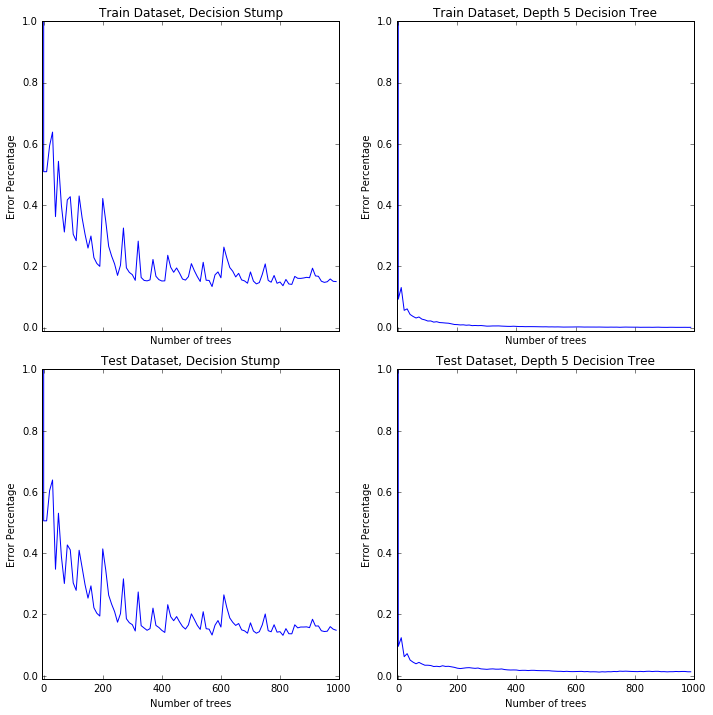

In [34]:
# ---- Plotting the errors ---- #
fact = 1
ax = np.arange(0,iterations*fact,step*fact)
ax = np.concatenate([[0],ax])

f1, arr = plt.subplots(figsize=(10, 10), nrows=2, ncols=2,sharex = True)
train_acc = train_acc[train_acc>0]
arr[0,0].plot(ax,(1-np.concatenate([[0],train_acc])))
arr[0,0].set_title('Train Dataset, Decision Stump')

train10_acc = train10_acc[train10_acc>0]
arr[0,1].plot(ax,(1-np.concatenate([[0],train10_acc])))
arr[0,1].set_title('Train Dataset, Depth 5 Decision Tree')

test_acc = test_acc[test_acc>0]
arr[1,0].plot(ax,(1-np.concatenate([[0],test_acc])))
arr[1,0].set_title('Test Dataset, Decision Stump')

test10_acc = test10_acc[test10_acc>0]
arr[1,1].plot(ax,(1-np.concatenate([[0],test10_acc])))
arr[1,1].set_title('Test Dataset, Depth 5 Decision Tree')

for i in range(2):
    for j in range(2):                
        arr[i,j].set_ylim([-0.01,1])
        arr[i,j].set_xlim([-5,iterations*fact]) 
        arr[i,j].set_xlabel('Number of trees')
        arr[i,j].set_ylabel('Error Percentage')
plt.tight_layout()